In [7]:
import numpy as np

from keras.models import model_from_json
from keras_preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt

In [2]:
#Load trainned model
json_file = open(
    "bottle_predicter_model.json", 
    "r"
)
loaded_model_json = json_file.read()
json_file.close()

#Convert JSON to Keras Model
model = model_from_json(loaded_model_json)
model.load_weights("bottle_predicter_weights.h5")
model.compile(
    'adam',
    'categorical_crossentropy',
    ['accuracy']
)

model.summary()

Model: "bottlePredicter"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 126, 126, 256)     2560      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 63, 63, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 61, 61, 128)       295040    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 30, 30, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 64)        73792     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 64)   

In [3]:
test_p = "../bottle/split/test/"

img_datagen = ImageDataGenerator(
    rescale = 1./255
)

test = img_datagen.flow_from_directory(
    test_p,
    target_size = (128, 128),
    color_mode = 'grayscale',
    shuffle = True,
    class_mode = 'categorical',
    batch_size = 64
)

Found 100 images belonging to 5 classes.


In [13]:
#Evaluate
score = model.evaluate(test)
print("LOSS : ", score[0])
print("AKURASI : %.2f%%" % (score[1]*100))

2/2 [==============================] - 4s 1s/step - loss: 0.5150 - accuracy: 0.9200
LOSS :  0.5149848461151123
AKURASI : 92.00%


In [14]:
class_names = ['Beer Bottles','Plastic Bottles','Soda Bottle','Water Bottle','Wine Bottle']
prediction = model.predict(test)
label_pre = np.argmax(prediction, axis=1)

2/2 [==============================] - 3s 1s/step


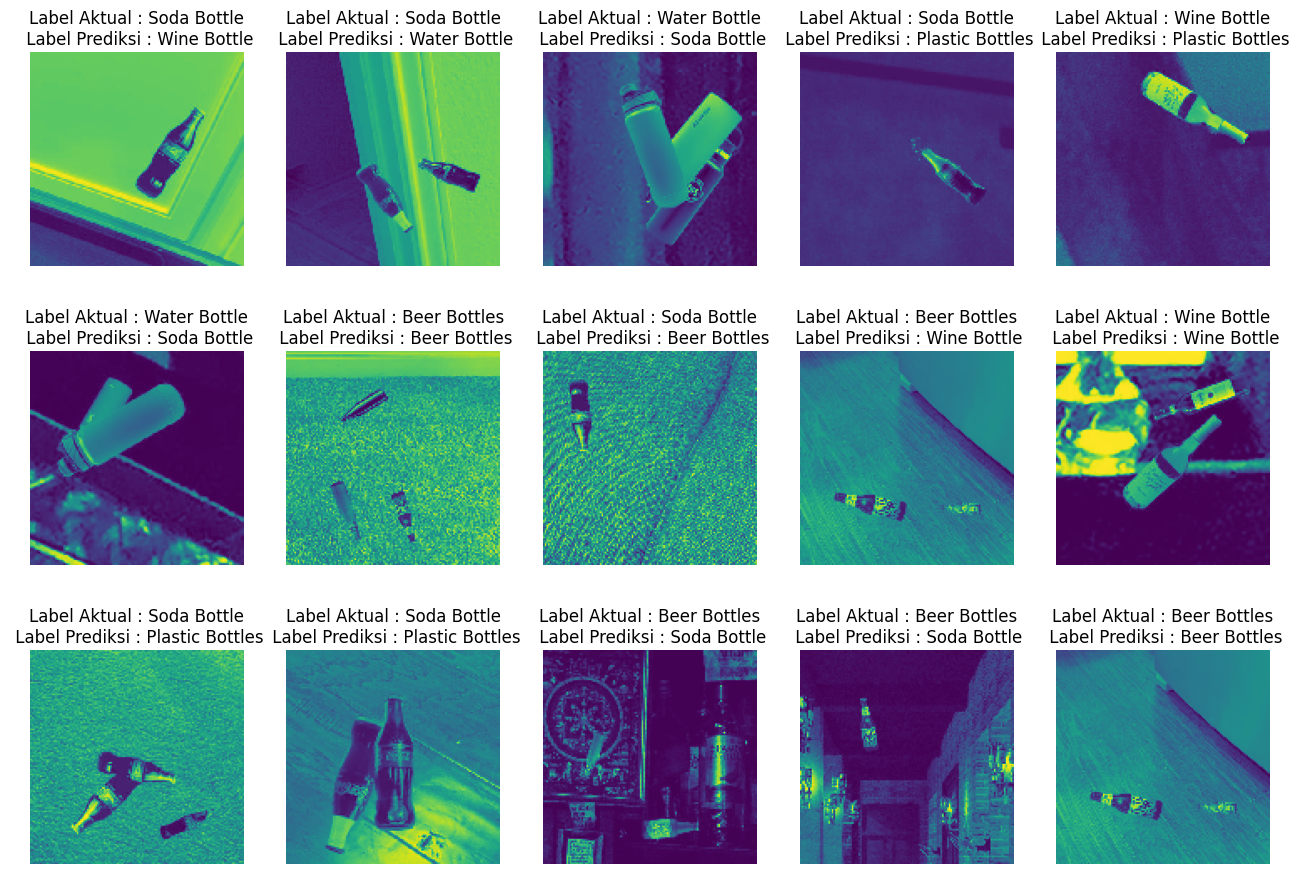

In [32]:
plt.figure(figsize=(16, 11))
for i in range(15):
    img, label = test.next()
    actual_label = class_names[np.argmax(label[0])]
    plt.subplot(3, 5, i+1)
    plt.title(f"Label Aktual : {actual_label}\n Label Prediksi : {class_names[label_pre[i]]}")
    plt.axis('off')
    plt.imshow(img[0])
plt.show()